# Práctica 3: _Travelling Salesman_

Trataremos de resolver el [Problema del Viajante (de Comercio)](https://en.wikipedia.org/wiki/Travelling_salesman_problem)

Es un problema [NP Duro](https://en.wikipedia.org/wiki/NP-hardness)

* [Vídeo explicación de P vs. NP](https://www.youtube.com/watch?v=UR2oDYZ-Sao)

## Problema

> Dada una lista de ciudades y las distancias entre cada par de ellas, ¿cuál es la ruta más corta posible que visita cada ciudad exactamente una vez y al finalizar regresa a la ciudad origen?

* Varias formulaciones
    * Miller, Tucker y Zemlin
    * Dantzig, Fulkerson y Johnson
* Métodos heurísticos
    * Colonia de hormigas
    * __Algoritmos Genéticos__

[Comparación de métodos](https://baobabsoluciones.es/blog/2020/10/01/problema-del-viajante/)

## Algoritmo Genético

Hallar una ruta tal que cumpla las

* Condiciones
    1. Cada ciudad debe ser visitada únicamente una vez
    2. Debemos terminar la ruta en la ciudad inicial

* Gen: ciudad, coordenadas $(x,y)$
* _Individuo_ (cromosoma): __ruta__ que satisface las condiciones
* Población: conjunto de rutas/individuos
* _Fitness_: función que da la _bondad_ de una ruta (distancia total recorrida)
* __Mutación y entrecruzamiento:__ cómo introducimos variación en la población

### Pasos

1. Crear una población inicial
2. Determinar _fitness_ de cada individuo
3. Seleccionar las mejores rutas (_generación parental_)
4. Generar nuevos individuos
5. Mutación
6. Repetición hasta _convergencia_

## Paquete de Algoritmos Genéticos en Python

[PyGad](https://pygad.readthedocs.io/en/latest/)

````{tab-set}
```{tab-item} Pip
pip3 install pygad
```

```{tab-item} Conda
conda install pygad
```
````


## Datos de ciudades

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
df = pd.read_csv('./data/cities.txt')
df.head()

,Ciudad,ID,Latitud,Longitud
0,Aberdeen- Scotland,1,57.09,-2.09
1,Amsterdam- Netherlands,2,52.22,4.53
2,Athens- Greece,3,37.58,23.43
3,Barcelona- Spain,4,41.23,2.09
4,Belfast- Northern Ireland,5,54.37,-5.56


In [3]:
xs=df.values[:,3]
ys=df.values[:,2]
cities=df.values[:,0]
locations = list(zip(xs, ys, cities))
len(locations)

45

In [4]:
cities[:5]

array(['Aberdeen- Scotland', 'Amsterdam- Netherlands', 'Athens- Greece',
       'Barcelona- Spain', 'Belfast- Northern Ireland'], dtype=object)

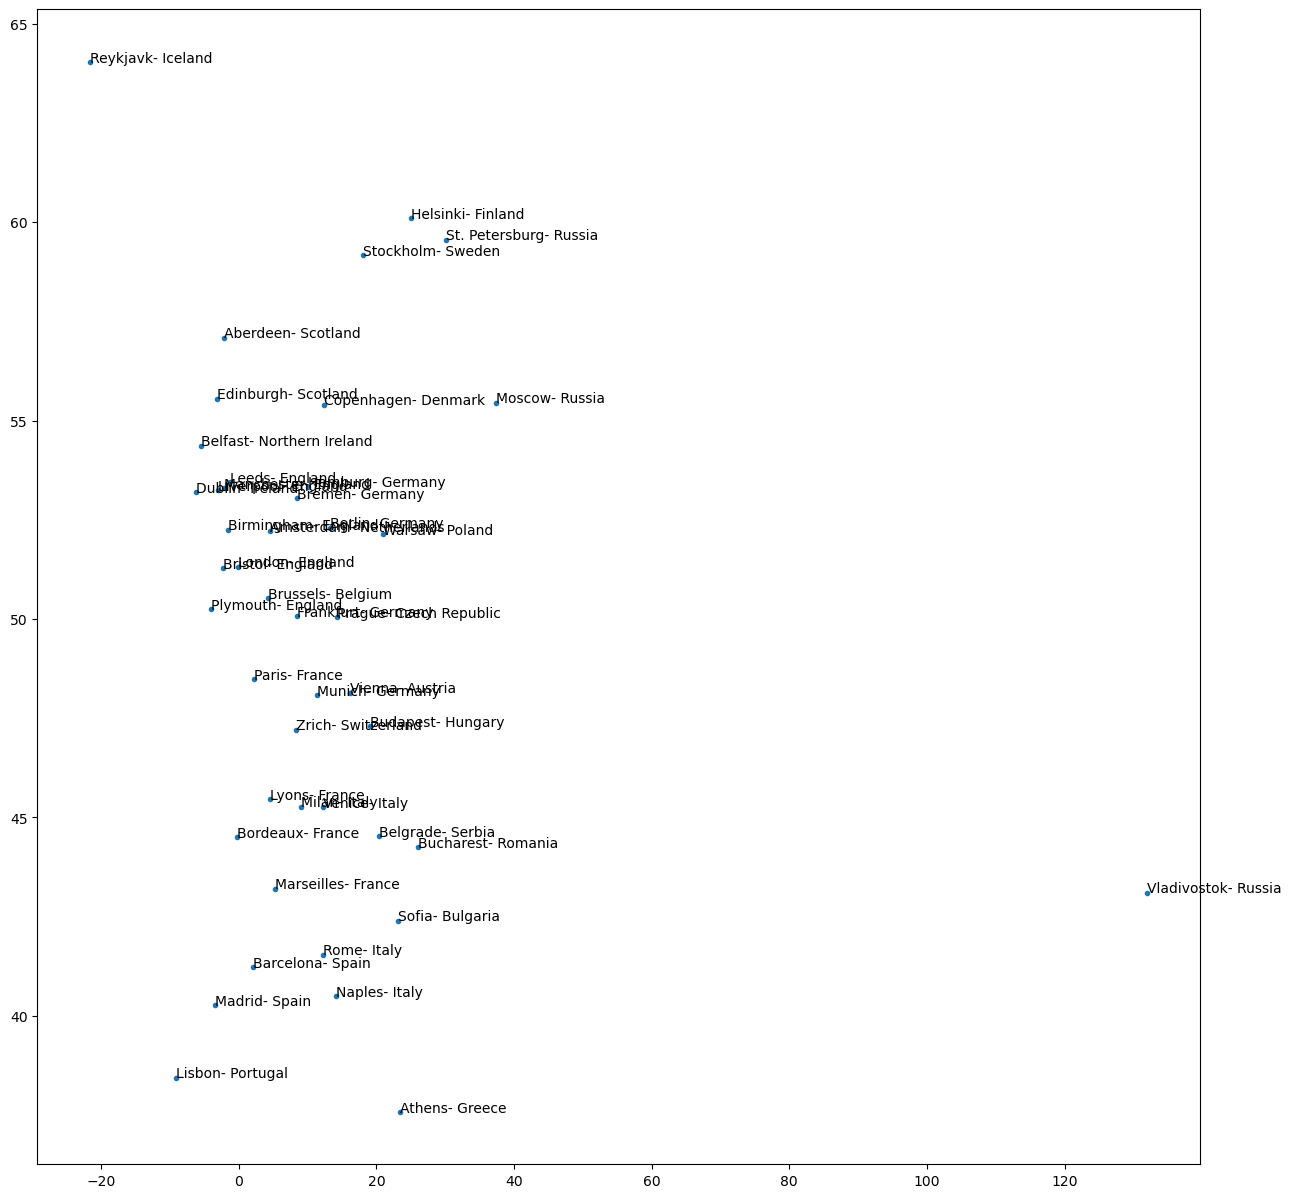

In [5]:
plt.figure(figsize=(15,15))
plt.plot(xs,ys,'.')
for i in range(len(xs)):
    plt.text(xs[i],ys[i],cities[i])

### Subconjunto de ciudades

In [6]:
Nciudades = 15
seleccion = np.random.choice(df.index.to_numpy(),Nciudades,replace=False)

In [7]:
seleccion

array([28, 21, 29, 18, 15, 37, 25,  2,  7, 30, 12, 11,  1, 38, 41],
      dtype=int64)

In [8]:
dfSel = df.loc[seleccion]
dfSel

,Ciudad,ID,Latitud,Longitud
28,Milan- Italy,30,45.27,9.10
21,Lisbon- Portugal,23,38.44,-9.09
29,Moscow- Russia,31,55.45,37.36
18,Hamburg- Germany,19,53.33,10.02
15,Dublin- Ireland,16,53.20,-6.15
37,St. Petersburg- Russia,39,59.56,30.18
25,Madrid- Spain,27,40.26,-3.42
2,Athens- Greece,3,37.58,23.43
7,Birmingham- England,8,52.25,-1.55
30,Munich- Germany,32,48.08,11.35


In [9]:
xs=dfSel.values[:,3]
ys=dfSel.values[:,2]
cities=dfSel.values[:,0]
locations = list(zip(xs, ys, cities))
len(locations)

15

In [10]:
dfSel.loc[np.random.choice(seleccion)]

Ciudad      St. Petersburg- Russia
ID                              39
Latitud                      59.56
Longitud                     30.18
Name: 37, dtype: object

In [11]:
locations

[(9.1, 45.27, 'Milan- Italy'),
 (-9.09, 38.44, 'Lisbon- Portugal'),
 (37.36, 55.45, 'Moscow- Russia'),
 (10.02, 53.33, 'Hamburg- Germany'),
 (-6.15, 53.2, 'Dublin- Ireland'),
 (30.18, 59.56, 'St. Petersburg- Russia'),
 (-3.42, 40.26, 'Madrid- Spain'),
 (23.43, 37.58, 'Athens- Greece'),
 (-1.55, 52.25, 'Birmingham- England'),
 (11.35, 48.08, 'Munich- Germany'),
 (26.07, 44.25, 'Bucharest- Romania'),
 (4.22, 50.52, 'Brussels- Belgium'),
 (4.53, 52.22, 'Amsterdam- Netherlands'),
 (23.2, 42.4, 'Sofia- Bulgaria'),
 (16.2, 48.14, 'Vienna- Austria')]

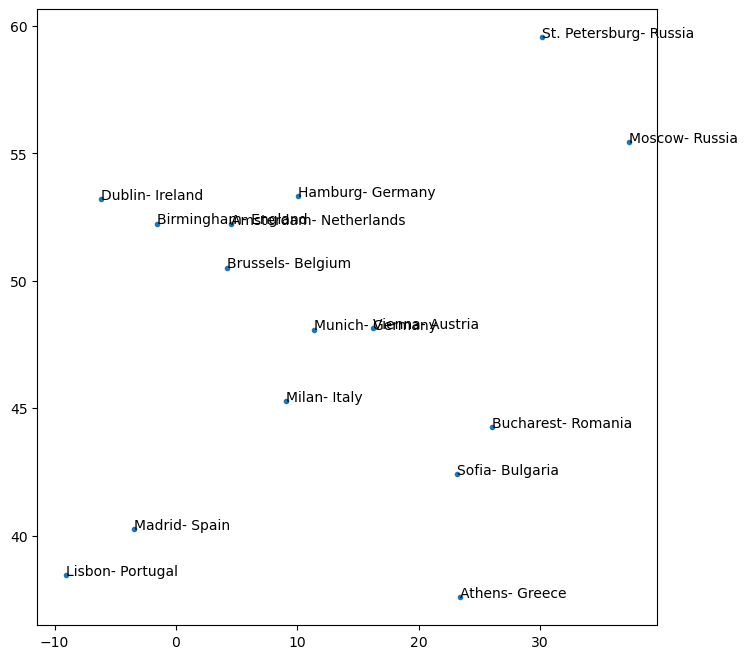

In [12]:
plt.figure(figsize=(8,8))
plt.plot(xs,ys,'.')
for i in range(len(xs)):
    plt.text(xs[i],ys[i],cities[i])

In [13]:
def euclid(p1,p2):
    x1,y1 = p1
    x2,y2 = p2
    dist = np.sqrt((x1-x2)**2+(y1-y2)**2)
    return dist

def fitness_func(ga_instance, solution, solution_idx):
    
    total_length = 0
    
    solAppend = list(solution.copy())
    solAppend.append(solution[0])
    
    for ii in range(len(solution)):
        cityStartIndex = solAppend[ii]
        cityEndIndex = solAppend[ii+1]
        
        cityStartX = dfSel.loc[cityStartIndex,'Latitud']
        cityStartY = dfSel.loc[cityStartIndex,'Longitud']
        pStart = (cityStartX,cityStartY)
        
        cityEndX = dfSel.loc[cityEndIndex,'Latitud']
        cityEndY = dfSel.loc[cityEndIndex,'Longitud']
        pEnd = (cityEndX,cityEndY)
        
        dist = euclid(pStart,pEnd)
        
        total_length += dist
        
    return total_length*-1 #fitness

### Parámetros

In [14]:
sol_per_pop = Nciudades*3 # Number of solutions in the population.
sol_per_pop

45

In [15]:
def on_generation(ga):
    print("Generation", ga.generations_completed)
    print(ga.population)

### Población inicial

In [16]:
population_list=[]
gene_space = seleccion
for i in range(sol_per_pop):
    nxm_random_num = list(np.random.permutation(gene_space))
    population_list.append(nxm_random_num)

In [17]:
population_list

[[21, 29, 38, 28, 12, 25, 7, 15, 2, 1, 41, 18, 37, 30, 11],
 [2, 28, 7, 21, 11, 30, 29, 25, 41, 1, 15, 38, 12, 37, 18],
 [12, 21, 28, 38, 30, 37, 29, 41, 11, 15, 1, 7, 2, 18, 25],
 [38, 30, 28, 7, 29, 11, 15, 2, 18, 21, 25, 1, 37, 12, 41],
 [21, 30, 29, 28, 11, 12, 15, 41, 18, 37, 2, 7, 1, 38, 25],
 [11, 18, 37, 7, 2, 21, 38, 41, 28, 12, 30, 25, 15, 1, 29],
 [15, 25, 38, 7, 12, 1, 28, 18, 21, 11, 30, 2, 37, 41, 29],
 [11, 38, 29, 41, 25, 12, 18, 7, 15, 21, 30, 1, 28, 37, 2],
 [11, 28, 25, 12, 30, 7, 2, 15, 41, 29, 1, 21, 38, 37, 18],
 [18, 15, 30, 21, 25, 2, 37, 29, 11, 1, 28, 12, 38, 41, 7],
 [1, 38, 30, 11, 37, 12, 7, 25, 28, 21, 2, 41, 15, 29, 18],
 [28, 37, 41, 29, 11, 38, 15, 2, 7, 12, 18, 25, 1, 21, 30],
 [11, 28, 41, 30, 38, 15, 18, 25, 37, 12, 21, 2, 29, 7, 1],
 [37, 12, 1, 21, 25, 15, 38, 30, 11, 18, 41, 28, 2, 7, 29],
 [12, 28, 37, 2, 29, 1, 11, 30, 38, 25, 7, 21, 41, 15, 18],
 [41, 15, 25, 18, 7, 12, 30, 38, 21, 1, 11, 28, 29, 37, 2],
 [41, 18, 7, 38, 12, 11, 37, 30, 28, 2, 

### Testeamos la función _fitness_

In [18]:
pob_random = population_list[np.random.choice(len(population_list))]
pob_random

[21, 29, 38, 28, 12, 25, 7, 15, 2, 1, 41, 18, 37, 30, 11]

In [19]:
fitness_func([],pob_random,9)

-293.1587522666464

In [20]:
dfSel

,Ciudad,ID,Latitud,Longitud
28,Milan- Italy,30,45.27,9.10
21,Lisbon- Portugal,23,38.44,-9.09
29,Moscow- Russia,31,55.45,37.36
18,Hamburg- Germany,19,53.33,10.02
15,Dublin- Ireland,16,53.20,-6.15
37,St. Petersburg- Russia,39,59.56,30.18
25,Madrid- Spain,27,40.26,-3.42
2,Athens- Greece,3,37.58,23.43
7,Birmingham- England,8,52.25,-1.55
30,Munich- Germany,32,48.08,11.35


### Definición del GA

In [21]:
import pygad

In [22]:
[list(seleccion) for _ in range(2)]

[[28, 21, 29, 18, 15, 37, 25, 2, 7, 30, 12, 11, 1, 38, 41],
 [28, 21, 29, 18, 15, 37, 25, 2, 7, 30, 12, 11, 1, 38, 41]]

https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#prevent-duplicates-in-gene-values

In [28]:
ga_instance = pygad.GA(num_generations=100,
                       sol_per_pop=sol_per_pop,
                       num_genes=Nciudades,
                       mutation_num_genes=Nciudades-1,
                       initial_population=population_list,
                       #random_mutation_min_val=min(dfSel.index.to_numpy()),
                       #random_mutation_max_val=max(dfSel.index.to_numpy()),
                       num_parents_mating=2,
                       fitness_func=fitness_func,
                       #gene_space = gene_space, 
                       parent_selection_type="rank",
                       gene_type=int,
                       gene_space=[list(seleccion) for _ in range(Nciudades)],
                       on_generation=on_generation,
                       #mutation_type="swap",
                       #mutation_percent_genes=10,
                       allow_duplicate_genes=False,
                       save_solutions=True)

In [29]:
ga_instance.run()

Generation 1
[[18 15 30 21 25  2 37 29 11  1 28 12 38 41  7]
 [ 7 38 41 37 11 28 18 15 30 12 21  1 25 29  2]
 [28 29 38 11 41 15 37 18  7 21 30  2 12 25  1]
 [37 18  2 38 11 15 12 29 30 28 21 41 25  7  1]
 [15 11 30  1 12 29 18 37  7 28 38  2 21 25 41]
 [11 18 41 37 15  2 28 25 38  1 21 30 29 12  7]
 [25 15 11 38  7 37 12 29  2  1 41 18 21 28 30]
 [37 12  1 15 30 38 18 25  7 41 11  2 21 28 29]
 [30 15 25 12 18 29 37 41 38 11  2 28 21  7  1]
 [25 37  2  1 18 15 38 11 29 12 21 28  7 30 41]
 [ 2 29 38 15 11 37 18 41 25 28 21 12 30  7  1]
 [30  2 41 11 12 21 25 28  1 38 15  7 29 18 37]
 [30 28 38 21 18 15 12 25 29 41 37  7  1  2 11]
 [25 38 30  7 37 11 12 15  2  1 28 21 29 41 18]
 [11 37 28  7 38 15  2 25 29 12 41 18 21 30  1]
 [21 41 28 11 30  1 18  7  2 15 25 12 38 29 37]
 [21  7 18 41  1 15 30 11 37 12 28 25  2 29 38]
 [21  1 30 15 38 41  2 12 28 25 37  7 11 29 18]
 [38 28  7  2 12 15 21  1 29 25 18 41 30 11 37]
 [37 15 41 29 25 38 21  1  2 18 12 28 11  7 30]
 [38 28 41 30  2 25  7 12 3

 [26 34  6  0 44  9 14  1 20 17 16 41  3 24 28]]
Generation 15
[[28  6 41 17 14  9  1 24 20 16 26  0  3 44 34]
 [17 28  3  0 41 24 14 34 20 44 16  9 26  6  1]
 [28  6  9 20 14  3 41 26  0 44 34 24 16 17  1]
 [24 44 14 41  3 34  9 20 26 16 28  6  1  0 17]
 [34 26  3 24 17  0 16 20  9  1 44 28 41  6 14]
 [28 20  3 41 14 34 44 24  6 26  9  1 16 17  0]
 [ 3 28 41 24 14  6  1 17 26 16 20  0  9 44 34]
 [14 16  3 17 28  9 26 20  6 44  0 34 41  1 24]
 [20  1 24  3 28  6 16  0 14 34 26 41  9 17 44]
 [34  3 44 16  1 17 41 24 26 20 28  9 14  0  6]
 [17 34 24  3 16  9  1 44 20 41 14  6  0 26 28]
 [16 14 26  6  3 34 17 41 20 44 28  9 24  1  0]
 [ 1  0 41 20 24  9 26  6  3 16 14 17 28 44 34]
 [24 41  0 34  6 17 20 26 28 44  1 14  3  9 16]
 [ 6 44 28  3 16 17 24  1 20  0 26  9 34 41 14]
 [41 14 24 20 44  9  1 28 17  6  0  3 34 26 16]
 [24 44 41 26  0  1  9  6 20 16  3 28 14 17 34]
 [17  3 26  9 14 28 41 24  0 16  1 20  6 44 34]
 [26 17 16  6 14  9  0 24 20 41  1 34  3 44 28]
 [ 6 28 41 14 17  1  9 24

[[28  6 41 17 14  9  1 24 20 16 26  0  3 44 34]
 [ 1  6 44 28 17 14 24  9  0 20  3 16 34 26 41]
 [ 0 24 41 14 44  9  1  3 17 34 26 16 28  6 20]
 [20  0 16  9  1 17 14  3 28 34 26 24 44  6 41]
 [24  0 17  9  1 20 41 14 34  3 26 16 44 28  6]
 [34 44 26 14 41  9  1 24 20 16 17  0 28  6  3]
 [34 16 20 14  3 24 26 44 41  9  0  1 28 17  6]
 [ 0  6 41  9 24 17 28 14 20 16 26  1 44  3 34]
 [17  9 16  6 34 41  1 44 20 14 26  0  3 28 24]
 [ 0  6 14 44  9 28 34 24 20 16 26  1  3 41 17]
 [ 0  9  3 14 28 41  1 44 26 16 24 17 34  6 20]
 [28  1 34 17  9 14  0 24 20 16 26  6 41  3 44]
 [34  3  0 24 28  1 20  6  9 14 26 41 17 44 16]
 [16  3  1 28 14  9 17  0 41 20 26 44  6 24 34]
 [41 44  1  6 26 14  3 24 20 16  9  0 28 34 17]
 [26  0 34 41 20  6 14  1 24 16 28  9 17  3 44]
 [24  6 44 34  3 16  1 28 20  9 26  0 14 41 17]
 [ 3 14  6 17 24  9  1 16 34 44 26 20 41 28  0]
 [26  3 20  0 28 14  1 17 41 16 24  9 34  6 44]
 [16  3 41 17 24 14  1  6 44 28 26  0  9 34 20]
 [ 3 14 16  9 24 26 20 44 17 28 34  0 41

Generation 23
[[28 44 24 17  6  9 14 41  1 16  0 20 26  3 34]
 [28 14 20  3  6  9 41 44 16 26 24 34  0  1 17]
 [ 1 14 20  9  0 28 17 16 34 41  6 24 26  3 44]
 [20 34  9 41  1 24  3 17 26  6  0 44 28 16 14]
 [44  0  9 17  6  3 14 41 28 16 34 20 26 24  1]
 [24  9 34 16 17 44 28 41  1  6  0 20 26 14  3]
 [44 17  3  1 16  0 14 41  9  6 28 20 26 24 34]
 [28 44  3 17 16  0 14 41  1  6  9 20 26 34 24]
 [ 9 34 28 41  6 16  3 17 24 20  1 44 26 14  0]
 [20 24 16 17  9 26 14 44 41 34 28  0  1  6  3]
 [ 9 17  0 34 16 26 14 41 20  6 44 24  1  3 28]
 [24  6 20  1 16 17  0 44  9 41 14 28 34 26  3]
 [26  0 44 17 24 41 14  9  1 28  3 34 16 20  6]
 [28  0 41  9 24  3 14 20 26  6 44 16  1 34 17]
 [16  9 28 24 20  0  3 44 14 41  6 34  1 26 17]
 [41 26  3  9 14 34 17 16  6 28  1 20  0 44 24]
 [20 17 16 44 26  0 14  6 34 24 28 41  9  3  1]
 [26 24 28 17  6 34  1 41 14 16  0  9 20 44  3]
 [41 16 17 34 20 28 14  6 44  0 26  9  1  3 24]
 [ 3 24 26 41  6  9 44 34  1 16 20  0 14 17 28]
 [17  1  0 44 20 24 14  6 

 [ 9 24 41  6 17 14 28 34 20 16  0  1 26  3 44]]
Generation 28
[[28 44 24 17  6  9 14 41  1 16  0 20 26  3 34]
 [20 24 17 14 28  1 44  3  9 16  0 26  6 41 34]
 [26 41  0 20 17  3  9 14 28 16  1 24  6 44 34]
 [41 24  3 17 14  1  6 28  9 26  0 20 16 44 34]
 [41 16  0  9  6 34 17  1 24  3 26 20 28 14 44]
 [ 9 14 44 17  1 28 24 26  6 20 34 16 41  3  0]
 [ 0 44 34 17  6 41 14  9  3 16  1 20 26 24 28]
 [14 28 24 41  1 20  3 17  6 16  0  9 26 44 34]
 [ 6 41 24 26  1  9 34 28 17 16 14 20  0  3 44]
 [ 6 44 16 41  3  9 14 17  1  0 26 20 24 34 28]
 [24 16 14 44  9 28  0 41 17 26  1  3 20  6 34]
 [ 1  3  6 17 24  9 20 26  0 16 28 14 41 44 34]
 [ 3 41  6 16 44 24 26 20  1 17  0 34 14  9 28]
 [16 20 28 14 44 17  0 41  9  3  1  6 26 24 34]
 [ 1  9 26 17  0 16 44 24 28 14  6 20 41  3 34]
 [24  6 20 44  1 28 14 26 17 16 41  9  0  3 34]
 [24 44  1 17  6 14 16 34  9 28 20 26  0  3 41]
 [ 1 34 26 41  6  9 17 14 28 16 44 20 24  0  3]
 [26 16 34 24 20  1 44 41  6  0  9 14 28  3 17]
 [ 6 41 28  3  1 44 26  0

Generation 32
[[28 44 24 17  6  9 14 41  1 16  0 20 26  3 34]
 [28 34  0 24 14 26  3 20 16 44  1 41 17  9  6]
 [41  3  9 24  6 26 14 20  1 44  0 28 17 16 34]
 [ 0  3  9 44 20 24 14 41  1 16 17 34  6 26 28]
 [14  9 44 28  0  6 24 41 34 17 16 26 20  3  1]
 [17 26  3 16 24  6  0  1 20 41  9 14 28 34 44]
 [26  1  9 14 17 20  0 28 24 16  3 41 44  6 34]
 [16  0 24  1  6  3 20 34  9 41 14 26 28 17 44]
 [ 0 17 16 41 26  9 14 34  3 28 20 24  6  1 44]
 [26 17 28 14 16 41 24 20  1  6  3 44 34  9  0]
 [26  1 24 41  0 14  9 34 16 28  6 44  3 20 17]
 [20 34 24 14  6 44 26 16  1  9  3 41 17  0 28]
 [ 3 16 34  9 26 17 14 41  1  6  0 44 28 20 24]
 [24 26  9 28 17 34 14 41  1 16  3  6  0 20 44]
 [16 44 26 28  3 14 24 34 20  1  0 41  9 17  6]
 [28 41 24 17  1  9  3 20 34  0 26 14 16 44  6]
 [41 14 16 34 17 28 44 24  0  1  9  6  3 26 20]
 [28  3  1 20 16  6 44  9 41  0 14 24 26 34 17]
 [41  3 24 28  0  9 44 20  1 17  6 14 16 26 34]
 [20 16 17 28 44 26 34 24  1  3  0 41 14  9  6]
 [34 16 26 14 17  6 24  3 

Generation 37
[[28 44 24 17  6  9 14 41  1 16  0 20 26  3 34]
 [20  0 24 16 41 14 34 28 44  1  6 17  3 26  9]
 [34 14 24  3 28 16  0 41  1  9 44 20 26 17  6]
 [14 44 26 17  6 20  0 16 24 28 41 34  1  3  9]
 [26 44  0 14 16  9 41  1  3 28 17 20  6 24 34]
 [ 0  9 14  6 17 24 34  1 41 16 20 28 26 44  3]
 [16 14  9 34 24 41 26 20  6 17  0  3  1 28 44]
 [14 16 17 20  3  9 28 41 26 44  6 34  1  0 24]
 [41 16 44  6 24 17  3 34  0 14 20 28 26  1  9]
 [ 9 41 28 34  0  3 44 20 14 16  6  1 26 17 24]
 [ 1 44 34 26 28 41  6 17 24 14  0 20  9  3 16]
 [34 41  1 16 17 24 14 26  0 44 28  3 20  6  9]
 [34  3  0 24  1 44 26 28 41 16 20 17 14  9  6]
 [20 41 14 34 28 44 24  6  9 16 26  1 17  3  0]
 [20 28 26 44 41 24  6 14  0 16  9 17  3  1 34]
 [20  6 41  0 14 17 28  1 26 16 24 34 44  3  9]
 [44 41  0  3 34 14  1 20 16 28 17  9 24  6 26]
 [16  1  0  6 17  9 14 28 44 41  3 34 26 24 20]
 [20  3 16  1  9 24 44 17 28 41  0  6 26 14 34]
 [ 3  0 24 17  6 20 14 26 41  1 44 34 16 28  9]
 [16 24  1 17 28  3 26 41 

 [28  0 34  6 26  3 41 44  1 24 20 16 14 17  9]]
Generation 41
[[24 34 44 41  6  9 14 17  1 16  0 20 26  3 28]
 [ 0 41  3 34 24  1 14  6 28 16 17 20  9 44 26]
 [ 9 14 28 17 34 16 44  1  3 41  0 20 26 24  6]
 [ 3 34 17 20  6 41 28  9  1 24  0 44 16 14 26]
 [41 34  9 26 14 44  1  6  3 16  0 20 17 24 28]
 [ 3  6  9 17 41 34 44  1 20 16  0 14 26 24 28]
 [ 3  0 41 17 34  6 14 26  9 16 44 24  1 20 28]
 [17 14 28 26  9  6  1 16 41 24  0 20 44  3 34]
 [41 20 34  3  0  6 14  1  9 16 17 26 28 24 44]
 [28  9 44  1  6  3 34 17 41 20  0 16 24 14 26]
 [ 9  6 16 20 34 44  1 41  3 14  0 28 17 24 26]
 [44 34 24 14 26  9 41 17  1 16  0  3 28 20  6]
 [34 17 26  3 41  9 16  1 20 14  0 44 24  6 28]
 [ 1 26 28  3 41  9 34 24  6 16 20 17  0 44 14]
 [14  9  3 16 44  6 17  1 41 34  0 20 26 24 28]
 [20 17 16 34 24  6 14 44  9 28  0  3 41  1 26]
 [ 6 28 41 14 17  3 34 44  9  1  0 20 16 24 26]
 [ 9 14 34 41  6 24 44  0  1 17 16 20 28  3 26]
 [24  0 41 44 28 20 14  6  1 16 26  3 34  9 17]
 [20 26 44 14  6 41  3 16

Generation 45
[[24 34 44 41  6  9 14 17  1 16  0 20 26  3 28]
 [17 34 44  6  1 41 24 26  9 16 14 20  0 28  3]
 [ 9 20  1 44 24 26 16 17  0 28 34 41  6  3 14]
 [28  3  0 44  6 24 17  1 14 16 41 20 26  9 34]
 [26 41  1 24  6 34 20 16 14 44  0 28  9  3 17]
 [ 1 34 24  6 41  9 16 28  3 14  0 17 26 44 20]
 [17 28 20  9 34 26 44 41 14 24 16  0  1  6  3]
 [14 17  3  0  6 28 44 41 24 16 20  1 26 34  9]
 [34 28 24 41  6 20  3 17  1 16  0  9 26 44 14]
 [ 1  3 41 28  6  9 16 17 24 14  0 20 26 44 34]
 [34  1  9 24 44 41 14 17 20  6  0  3 26 28 16]
 [ 3 16 44 28  9 34 24 41 20 14  6  1 26 17  0]
 [ 9  3 17 16 14  6 44  0 26 41 24 20  1 34 28]
 [44 34  3 41  6 26  9 17 20  1  0 16 14 28 24]
 [26  0 17  9 24 41  1 34  6 16 20 28 14  3 44]
 [20 41 34  0  3  6 44 17 24  9  1 16 26 28 14]
 [ 3  0 24  1  9 34 28 17 44 20 14 16 26  6 41]
 [ 0  1  6 17  9 14 44 41 24 28 34 20 26 16  3]
 [20 34  0 26 24  1 16 17 41 14  3  6  9 28 44]
 [34 26 14 41 17 24  3  6  9 16  0 20  1 28 44]
 [ 0  6 44  9 24 17 14  1 

Generation 49
[[24 34 44 41  6  9 14 17  1 16  0 20 26  3 28]
 [ 1  3 20 28 34 41 14 16 24 17  6 44 26  0  9]
 [24  1  0 16 17  6 44  9 28 34 20 41 14  3 26]
 [28 26 44 20 14 34  1 17 24  6  0 16  9  3 41]
 [17 24  3  9 20  6  1 34  0 28 14 44 26 41 16]
 [14  1 17 20  3 24 28 26 16  9 41 34 44  0  6]
 [26  6 34 14  0  3 41 17  1 16 44 20  9 24 28]
 [26  6 17 14  0  9 16 44  1 20 34 41  3 28 24]
 [ 3  1 20 41 26 14  6 17  0 24  9 16 44 34 28]
 [ 3 34 17 16  1  0 44 14  6 41  9 26 20 28 24]
 [26  3  6 16 14 17  9 28 20 41  0 34  1 24 44]
 [16 24 28  6 44  9 14  3  1 34 26  0 17 20 41]
 [16 20 24 41  6  0 28 17  1  3  9 44 26 34 14]
 [ 9  6 44  3  0  1 28 17 26 34 16 41 24 14 20]
 [ 9 26 24 41 28 17 14 16  6  1 34  3 44  0 20]
 [ 1 16 26  3  6 14 17 24  9 44  0 20 28 34 41]
 [ 3 16  6 17 41 26  1 44 14 34  9 20  0 24 28]
 [20  0 28 41  6  9 14 16  3 17 44 24 26 34  1]
 [44 34 20  1 41 14 17  3 26 16  0  6 24  9 28]
 [34 28  6 20 16 26  0 17  3 41 44 14  1 24  9]
 [20 26 44  1 16 41 28  6 

[[24 34 44 41  6  9 14 17  1 16  0 20 26  3 28]
 [ 6 26  3  9 41 24 20 17 14 28  0  1 34 44 16]
 [24 26 34 14 44 41  0 17 16  6 28  1  9  3 20]
 [28 26  6 41 44 17  1  3 14 16  9 20 34  0 24]
 [44  6 41  0 20  9 14 26  1 16 24 34 17  3 28]
 [41 28 34 20 44  9 14 17 16 26  0 24  1  3  6]
 [28  6 41  0 24 34 14 17  9 16 44 20 26  3  1]
 [ 0  6 41 44 34 17  1  9 14 16 24 20 26  3 28]
 [20  9  0 14 26  1 41 28  3  6 44 24 34 16 17]
 [34 24 17 26  9  6  0 44 14 41  1 20 16  3 28]
 [ 3  0  9 41 24 20 14  1 44 34 16 17 26  6 28]
 [ 3 34 44  9 28 16 14 17 20 41  0 24 26  6  1]
 [ 0 16 41 44  1 26 20 17  6 14  9 24 34  3 28]
 [41  6 44 20  3 28 16 14  1  9  0 24 26 34 17]
 [ 0  3 14 20 44 34 41  1  9 16 17 24 26  6 28]
 [ 1  6 14  3 24  9 44 17 34 16  0 20 26 28 41]
 [44 17 41  6  9  0  3 24 14 16 34  1 26 20 28]
 [34 20 28  6 41 14  3 17  9 26  0 24 16  1 44]
 [ 0 26 44 41 17 34 16  1  3 14  9 20  6 24 28]
 [16 17  3 41 20 28 14 34  1 24  0  6 26 44  9]
 [26 34 41  1  6 24  0 14 44 16 17 20  9

Generation 58
[[17  9 14  0 16 26 20 41  6 34 28 24  3  1 44]
 [ 6  9  3  0 17 34 20 41  1 44 14 16 26 24 28]
 [20  3 44  0 17 26 24  9 14 16 28 41  6  1 34]
 [41  0 28 44 16 26  3 17  6  1 14  9 34 20 24]
 [20 24  1  3  6 34 14 17 44 16  9  0 41 26 28]
 [41 20  9  1 16 26  6 34 14  0 28 17 44  3 24]
 [ 9  0 20 17 16 26 44  1  6 34 28 24  3 41 14]
 [ 0 14  6 24 44 16 20 41  9  3  1 34 26 17 28]
 [34  1 28  6 24 20 26 41 14  9  0 17  3 16 44]
 [26  9 41 34 17  1 20 24 44 16  0 14  3  6 28]
 [20 34 16  6  3  1 14 17  0 44 28 24 41  9 26]
 [14 16 28 34  6  9  0 17  1  3 41 20 26 24 44]
 [ 0  1 26 14 41  9  6 20 44 17 28 34  3 16 24]
 [41 26 16  0 20 34 17 14  1 24  6 44  9  3 28]
 [17 44 20  0 24 26  6 41  3 28 16  9 14  1 34]
 [44 41  6 17  9 34 14  1 16 24  0 20 26  3 28]
 [ 6  9 24  0 34 26 20 14 41 16  1 28  3 44 17]
 [ 9 24  3 16 26 14 17  1 34  0 41 20  6 44 28]
 [24  9 28 16 34  6 41 17  1 26  0 20  3 44 14]
 [24 41  9 16  6  0 34  3 17  1 26 44 20 14 28]
 [ 0 17 26 28 34 20 41  6 

 [44 20 24 14 16 17 28 26  9 34 41  3  1  6  0]]
Generation 63
[[17  9 14  0 16 26 20 41  6 34 28 24  3  1 44]
 [24  0 44 34 16 41 20  1  3 28  6 17 14 26  9]
 [24 26 28 44 20  6 16  3  1 41  0 14 34  9 17]
 [ 6 28 14 44 16 26  0 24 41 17  9 34  3 20  1]
 [ 3 41 26 34  6 24  0  9 28 14  1 44 20 17 16]
 [16  0 28  1 17 20 41 24 14 34  3  6 44 26  9]
 [ 0  1  6 24 16 17  9 20 14  3 28 41 44 34 26]
 [ 6  0 17 44 26 16 20 41  1 34 24 28  3 14  9]
 [24 26  1 28 16  6 20  9  3 34  0 17 14 44 41]
 [ 6  9  1 20  3 26 41 24 17 34 44  0 16 28 14]
 [ 1  9 20 26  0 16 41 17 44 34 24 14  6 28  3]
 [41  9 44 24  6 17 20 26 16 34 14  0  3  1 28]
 [ 3 16 17 24 26  6  0 44 20 34 41  9 14 28  1]
 [41  3 34 16  0 24 14  9  6 20 26 44 28 17  1]
 [ 1 24 14 44 28 26 17  0  6 34 16  9 20  3 41]
 [ 3 41  0  1 16 14 44 17  6 34 26  9 24 28 20]
 [24 44 41 34  1 26 28 14 20  0  6 17  3 16  9]
 [14 26 28  6 34 41 20 44  0 16 17  3  9  1 24]
 [16  3 41 17 34  9 14 44 28 24 26 20  6  1  0]
 [24 26 14  3 28 41  1  9

Generation 67
[[17  9 14  0 16 26 20 41  6 34 28 24  3  1 44]
 [ 6  0 41  3 17 26 14  1 16 24 28 44 20  9 34]
 [ 9  0 44 14 16 26 20 24  1  3 28 41 34  6 17]
 [44  6 17 14 26  3 20 41 16 24  9 34  0 28  1]
 [ 9 34 14  0 16 26 20 41  6 17  1 24  3 28 44]
 [44  3  6  0 16 41 34  9 14 24 28 17 26  1 20]
 [26 17 14  6 16 44 34  0 41  3 28 24 20  1  9]
 [ 9  1 14  6 41 44 20 16  0 24 28 34 17  3 26]
 [41 44 14 20 16 26 34 17  6 24 28  0  3  1  9]
 [ 3 41 20 24  9  1 34 44  6  0 16 14 26 17 28]
 [16 20 14  9  6 26 24 41 34 17  0 44  3  1 28]
 [28  0 14 16 24  9 17 44  3 34 20 26  1  6 41]
 [44 17 14  0  9 26  1 28  6 24 41 16  3 20 34]
 [ 0 24 34  6 20 26 17 41 16 14  1  9 28  3 44]
 [16 41  9 20 28 26  3 44  0 34 17 24  6 14  1]
 [28 17 41 44 24 20 26 14  9 16  6  0  1  3 34]
 [17 16  3 44  9 24 34 41  6  0 28 20 14  1 26]
 [26  6 17 28 24 34 14  3  9 16  0 20  1 44 41]
 [ 6 41 14  1 26 16 20 44  3 24  0 34 17 28  9]
 [34 17 16 14  9 24  1 41  6 26  0 20 44  3 28]
 [17 16  9 34 44  3  0 28 

 [24 28 16 14 34  0 20  9 26  6 41 44  3  1 17]]
Generation 71
[[17  9 14  0 16 26 20 41  6 34 28 24  3  1 44]
 [ 0  9 26 17 16 28 20 24  3 34  6 41 14 44  1]
 [16  1 17 28 24 26 20 41  6 34  0 14  3  9 44]
 [ 3 17  0 14 41 24  6  9 26 44 28 20 16 34  1]
 [44  1  9 34 16 17  3 41  6 20 26 28 24  0 14]
 [ 9 24 41  0 17 44  1 14  6 34 28 16  3 26 20]
 [ 1 14  6  0 26 28 20 41 17 34 16  3  9 24 44]
 [ 9 28 41 20 16 34  0 17  6 26 44 24 14  3  1]
 [20 44 41 28  1  9 14 16  3 34  0 17 24 26  6]
 [24  6 34  0 44 26 20 41 28 14  1  3  9 16 17]
 [24  0 44 26 16 14  3 34  6 41 28  1 20  9 17]
 [28 41 20  0  3  6 44  9 17 34 14 24 16 26  1]
 [34  1 20 28  3 44 24 41  6  0 17 16 14 26  9]
 [ 9 34 20  0 16 26  1  3  6 44 28 14 17 41 24]
 [17  1 34  0 16 26 20 41  6 24 28 14  3  9 44]
 [ 3 17 26 16  0 34 20 41  9 24 14 44 28  1  6]
 [26 41 34  0  9  3 24  1  6 17 28 44 14 20 16]
 [44  3 14 34 41 28 24 26  6  0  9 20 16 17  1]
 [24  1 17  0 34  6 28 41 26 16 44 14  9  3 20]
 [ 3 34 41  0 26 17 24 14

 [16  0 14  1 26 34 17 41  6 44 28 24  3  9 20]]
Generation 75
[[17  9 14  0 16 26 20 41  6 34 28 24  3  1 44]
 [44  9  0  1 26 17 16 41 20 34 28 24  3 14  6]
 [ 6  0 17 20 41 14 26  9 28 34 16 24  3  1 44]
 [41 34 26  0  3 24 20  1  6 44 28 14 16  9 17]
 [26  9  3 20 16  6 17 44 34  1 14 24 41  0 28]
 [14 20 44  0  3 26  9  1  6 17 28 34 16 24 41]
 [34 20  3 44 17 16 14 41  6  9 24  1 26  0 28]
 [26  6 41  1 20 16 14 17 28 34  9  0 44 24  3]
 [ 3  0  9 16  1 34 17 28  6 44 41 24 26 14 20]
 [41  1 44 20  6 34 24 14 26  3 17  0 28 16  9]
 [ 3 26 20 24  1 34 14 41  9 28 17  6 44  0 16]
 [34 44  0  9 41  6 28 24 17  1 16 26  3 14 20]
 [28  0 26 17 20  9  1 41  6 24 16 34 44 14  3]
 [ 0 28 24 14 17 16 34 41  1 44  3 26  9  6 20]
 [28 41 44 26  1 17 20  0  6 34 16 24  3  9 14]
 [16 44  1  0 20 26 17 34  6 41 28 24  3  9 14]
 [ 3 26 20 41  0 34 17  6  1 14 28 24 16  9 44]
 [ 6 17 44  9 34  1 20 26 24 14 28  0 16  3 41]
 [24 28  6  1 41  0 17 14 26  9 34 16  3 20 44]
 [ 6  3 17 24  0 34 44 41

Generation 79
[[ 1  3 24 34 28 44 17 14  6 41  9  0 20 26 16]
 [ 1 44 16 41 28  3 20  9 17 34  6  0 26 14 24]
 [24 16 17 41  9  1 26 34 44 14  3  0 20 28  6]
 [41 17 24  1 28 44 34  9  3 16  0  6 26 20 14]
 [20 16 34 17  9 28 44  1  6 26 14  0  3 41 24]
 [28 41 20 17 44  1 34 14  6  0  9  3 24 26 16]
 [26 14  1 17  9 34 28 44 16 41 24 20  0  3  6]
 [ 1  0 16  3 28 44 17 26  6 14  9 34 41 20 24]
 [ 9 44  1  3 17  0 28  6 26 34 24 16 20 14 41]
 [24 14  6  0  9  3 20 44  1 26 16 34 41 17 28]
 [ 0 16 24 17  3 44 14 28 34 41  1  9 20 26  6]
 [26  1  3 44 24 16 17 14 28  9  6 34 41 20  0]
 [17 14  9  3 28 44 24 16  6 41  1  0 20 26 34]
 [26 41 16  1  0 44 28 14  9  3 17  6 34 20 24]
 [ 3 26 24 14 28 44 17 34  9 41 20  0  6 16  1]
 [41  3  1  0  6 44 28 34 16  9 24 14 26 20 17]
 [44 14 41  1 24  0  3 34 26 28  9  6 20 17 16]
 [44 20 14 16  1  9 28 34  3 26  6  0 41 24 17]
 [24 20 16 34 28 44  6 17 14 41  9 26  3  0  1]
 [24  3 16 14  1 41  6 44 34 17  0 28 26 20  9]
 [ 0  9 26  3 24 44 28 34 

Generation 83
[[ 1  3 24 34 28 44 17 14  6 41  9  0 20 26 16]
 [14  3 24 17  0 44 16 41  6  1  9 28 26 20 34]
 [17  1 26 20 41 28  3 14  9 44  0 34  6 16 24]
 [41 28 16  1  3 34 24 26  0  6 20 44 14  9 17]
 [44 26 16 41  1  3 28 17  6 34 14  0 20 24  9]
 [ 0 26 17 24 28 20 34 14 16 44  6  9  3  1 41]
 [26 41  1 20 28  9  3 14 24  6 34 44 17 16  0]
 [ 1 41 28 17  6 44  0 14  3 24  9 26 20 16 34]
 [ 0 41 16 44  6  9 26 17  1 28  3 20 14 34 24]
 [24 16 41 26 17  1  0 44  9  6 34 14 20 28  3]
 [41 14  1 20 26  9 28  3 17  6 44  0 24 16 34]
 [28 34 24  9 16 14 20  3 41  6 17 44 26  0  1]
 [24 17 20  6 44  9 28  1 41 16 34 26  0 14  3]
 [16 44 28 41 26  9  1 17 20  6 34  3 14  0 24]
 [24 16 28  9 14 20 44  1  0  6 26 41  3 34 17]
 [ 6 28 16  0 24 14 20  9 41  1  3 44 26 34 17]
 [17 26 24  9  1 34  0 14  3  6 41 16 20 28 44]
 [20 16 14 26  3 34  6 24  9 17 41 44  1  0 28]
 [28  3 41 34  1  6 20 14  9 16 26  0 44 24 17]
 [16 14 41 20 26 28 17  9  6 34  1 44  3  0 24]
 [16  6  1 14 28 44  3 34 

Generation 87
[[ 1  3 24 34 28 44 17 14  6 41  9  0 20 26 16]
 [17 41 34 44 24  1 26  0  3 20  9  6 28 16 14]
 [ 9 14 41 34  0 44 20 26 24  6 16 28  3  1 17]
 [ 0 26  6 34 20 44 17 14 41 28  9 24  3 16  1]
 [24 28  3  1 17 44 34 20 26 41  9  0  6 14 16]
 [44 24 41 26  0 17 16 28  6 34  9 14 20  3  1]
 [34  1  0  9 16 41 17  6 24 14  3 26 20 28 44]
 [34  3 41  1 20 26 17 24 44  6 28  9 14 16  0]
 [ 6 17  0 41 26 44 16 14  9 24 28 34 20  3  1]
 [14 28 26  6  3 17 16  1 34 20  9 24 41 44  0]
 [ 1 41  3 17  6 44 34 20 14 26  9  0 28 24 16]
 [ 6 26  1 17 28 44 34 14  3 20 41  0  9 16 24]
 [26  9 34 44 20  1 28 24  6 41 17  0  3 14 16]
 [41  3 24 20 14  9 34 16  1 44 17  6 28 26  0]
 [14  0 28 34  3 44 17 24  6 41 26  1 20  9 16]
 [34 28 17 24 16  3 14 41  1 44  9 20 26  6  0]
 [14  9  0  6 20  3 34 24 44 17 28  1 41 26 16]
 [41 17  3  6 28 14 24 26  1 20  9 34 44 16  0]
 [16  1 28 17  6  3 44 24 34 41  9 14 20  0 26]
 [41  0  3 20 16  9 17 34 28 44  1  6 24 26 14]
 [44 16  9  1 28 41  3 20 

 [ 3  1  0 28 16  9 17 34  6 26 14 24 20 41 44]]
Generation 91
[[ 1  3 24 34 28 44 17 14  6 41  9  0 20 26 16]
 [44 34  9  3 16  1  6 14 17 41 24  0 20 28 26]
 [ 1 16 28 24 41 17  6 14 44 34  9  0 26 20  3]
 [24  9 20 34 16 44 17 14  3 41  6  0 28  1 26]
 [ 1 16 20  0 28  9  3 44  6 34 14 41 17 26 24]
 [34  3 26 41 16  6 17 14 44 20  1  0 24  9 28]
 [ 1 34 20 17  3 28  9 14 24 26 41  0 16  6 44]
 [ 3 20 24 41  0  6 16 26  9 17 44  1 34 14 28]
 [34 17 44 24  1 28 41 14  6 16 20  3 26  0  9]
 [14  3 28  0 24 34 41  1  6 17  9 44 26 20 16]
 [28 14 20 34 44 41  6 26 17  1  9  0 24  3 16]
 [ 9 34 28  0 20  6 41 16 44 17 14 26  1  3 24]
 [ 6 24  0 34  3 16 41 14 20  1 44 17  9 28 26]
 [44  3 20  6 24 34 41 14  0 17 26  1 28 16  9]
 [26  0  6  9 28 16  1 14 34 41 20 44  3 24 17]
 [28 41 20  9 16  6  3 14 24 17 44  0  1 26 34]
 [20 14 44  0 28  6 16 26 41  9 17 24 34  3  1]
 [26  3 20  9 17  6 34  1 44  0 41 24 16 14 28]
 [16  0 17 14 28 44 41 20  6 34  9 26  3 24  1]
 [34  6 16  9 44  1 28 14

Generation 95
[[ 1  3 24 34 28 44 17 14  6 41  9  0 20 26 16]
 [28  1 26  0 17 14 34 24  6 41  3 16 20  9 44]
 [41  0 14 26  6 34 28  3 24  1  9 17 20 44 16]
 [14  3 34 26 20  1 16 17  9  0 41  6 24 28 44]
 [ 0 24 28  6  1 34 14  3 17 44  9 41 20 26 16]
 [34 41  3  1 28 44 17 14  6 24  9 16 20 26  0]
 [20 44  3 16  0 34  9 24 17  6 41 28 14 26  1]
 [ 1  3 41  6 28 26 17 14 34  0  9 44 24 20 16]
 [26  9 17  6 20 34  0 24 41  3  1 28 16 44 14]
 [14  3  6 24 16  0 26 20 34  9 17 41  1 44 28]
 [ 3 44 26 17 41 34  9  0 24 14  1 28 20  6 16]
 [ 0  1 14 16 28 41  9 24  3  6 44 34 20 26 17]
 [17  6 24 14 41  3  9 34 20  1 44 28  0 26 16]
 [ 9 28 20 34  0 44  1 24 14  6 26 16  3 41 17]
 [41  3 26  6 16 34  9 24  0  1 14 44 20 17 28]
 [41  3 26 28 34  6 20 16 44 14  9  0 17 24  1]
 [24  9 14 41  6  1  3 44 26 17 16 34 20  0 28]
 [41 17  3 24 16 44  1  0  9 34  6 26 20 14 28]
 [16 17 26 41  3  6 24  1 14 28  9  0 20 34 44]
 [ 6 24 26 44  9 17  3 34  1  0 16 41 20 14 28]
 [ 6 17  1 41 44 28 34 14 

Generation 99
[[ 1  3 24 34 28 44 17 14  6 41  9  0 20 26 16]
 [ 6 34 44  9 28  1 17 41 24 20  3  0 14 26 16]
 [16  6  0 20 26 17 28 14  1  3  9 24 34 44 41]
 [16  3 24 34 17  6 28 44 41 14  9  0 20 26  1]
 [16  6 34  3  0 20 28 26 24 44  9 17  1 14 41]
 [28 41 24  3  1 34 17 14  6 44 26  0 20  9 16]
 [20 14 44 41  0  3 28 16 24  1  6 34 17 26  9]
 [14  1 44 24  0 41 20  6 34  3  9 26 28 17 16]
 [34 14 44 28 20  1 17  0  3 24  9  6 41 26 16]
 [ 0 34 16  3 44  9 17 28 14 24 20  1  6 26 41]
 [20 44 28 24  6  1 17 14  3 34  9 26 41  0 16]
 [17  0  6 16 28 20  9 26 41 24  1  3 14 44 34]
 [28  1 14 34 44 20 17 41 24  3  9  6  0 26 16]
 [ 9  3  0 17  1 20 28 26 41  6 34 24 44 14 16]
 [26  1 41 24  6 14 17 44 34 28  3 20  0  9 16]
 [34 17 41 28 26 24 14  3  9  0 44  6 20  1 16]
 [ 0 34  1 26 41 16 17 24 44  3  6 14 20  9 28]
 [34 20  9  0 16 44 17 28 41  1 24 14  3  6 26]
 [24  9  1 28 20 17 41 14  6  3 34  0 44 26 16]
 [14 17 24 16 28 20  6 44  0  1  9 41  3 26 34]
 [ 0  3  9 34 28  1 17 16 

In [30]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("best_solution: {solution}".format(solution =solution)) 

best_solution: [28 25 15 21  7 18 11 30 41 12 38  2 29 37  1]


In [31]:
print("best_solution fitness: {}".format(solution_fitness))

best_solution fitness: -172.72321893306506


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


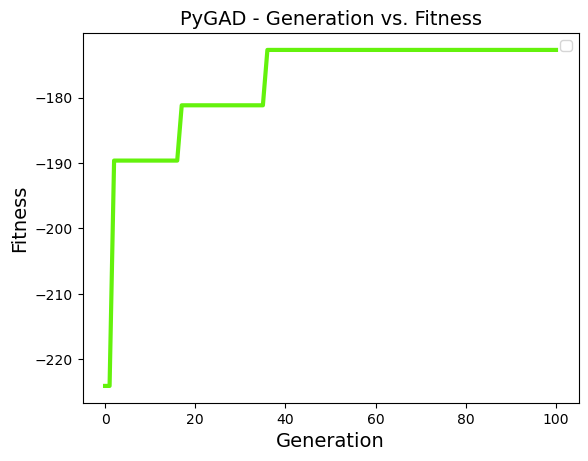

In [32]:
ga_instance.plot_fitness()
plt.close()

In [33]:
ga_instance.population

array([[28, 25, 15, 21,  7, 18, 11, 30, 41, 12, 38,  2, 29, 37,  1],
       [ 2, 41, 29, 15,  1, 12, 11, 38, 21,  7, 30, 25, 37, 28, 18],
       [38, 25, 18, 15, 29,  2, 21, 30, 11,  7, 12, 28, 41,  1, 37],
       [21, 25, 11, 12, 28,  7, 15, 30,  1, 18, 37, 29, 38, 41,  2],
       [25, 41, 15, 30, 11,  1, 38, 12, 21, 18, 29,  2, 37,  7, 28],
       [ 7, 11, 29, 28, 25, 15, 21, 30,  2, 18, 38, 41, 37, 12,  1],
       [30, 21, 18,  2, 29, 37,  7,  1, 41, 15, 11, 25, 28, 38, 12],
       [38, 41, 29, 30, 15, 25, 21, 28, 37, 18, 11,  1,  2, 12,  7],
       [11, 12, 18,  1, 37, 38, 29, 30, 41, 25,  2, 28, 15,  7, 21],
       [21, 41,  1, 11, 37, 25,  7,  2, 29, 18, 15, 38, 28, 12, 30],
       [41, 21, 37, 18, 15, 25,  1, 30,  7, 38, 12, 28, 29, 11,  2],
       [11, 12, 21, 37, 29, 41,  1, 18,  7, 30, 38, 25,  2, 28, 15],
       [11, 18,  2,  7, 15,  1, 12, 30, 37, 29, 25, 28, 41, 38, 21],
       [37, 30,  2,  7, 38, 29, 11, 18,  1, 15, 41, 12, 21, 28, 25],
       [25, 28, 18, 29, 15,  1, 37

### Gráfica de la ruta

In [34]:
solution

array([28, 25, 15, 21,  7, 18, 11, 30, 41, 12, 38,  2, 29, 37,  1])

In [35]:
dfSel

,Ciudad,ID,Latitud,Longitud
28,Milan- Italy,30,45.27,9.10
21,Lisbon- Portugal,23,38.44,-9.09
29,Moscow- Russia,31,55.45,37.36
18,Hamburg- Germany,19,53.33,10.02
15,Dublin- Ireland,16,53.20,-6.15
37,St. Petersburg- Russia,39,59.56,30.18
25,Madrid- Spain,27,40.26,-3.42
2,Athens- Greece,3,37.58,23.43
7,Birmingham- England,8,52.25,-1.55
30,Munich- Germany,32,48.08,11.35


In [36]:
xs=[]
ys=[]
cName=[]
for ii,ee in enumerate(solution):
    ciudad = dfSel.loc[ee]
    xs.append(ciudad.Longitud)
    ys.append(ciudad.Latitud)
    cName.append(ciudad.Ciudad)
xs.append(xs[0])
ys.append(ys[0])
cName.append(cName[0])

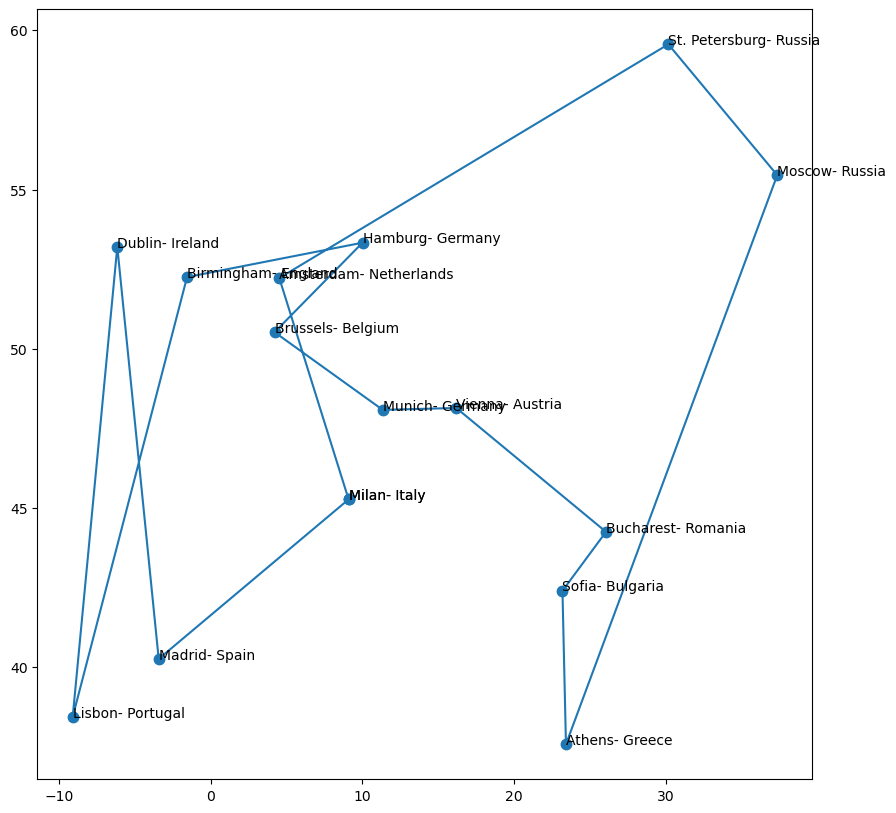

In [38]:
f,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,10))
ax.plot(xs,ys,'.-',markersize=15)
for i in range(len(cName)):
    plt.text(xs[i],ys[i],cName[i])